<a href="https://colab.research.google.com/github/lukiod/dl-college/blob/main/lab2_ann_presptron_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, log_loss

## Problem 1

In [22]:
# Load IRIS dataset
dataset = load_iris()
X, y = dataset.data, dataset.target

# Select only Setosa and Versicolor (Binary Classification)
selected_classes = (y == 0) | (y == 1)
X, y = X[selected_classes], y[selected_classes]

In [23]:
list(dataset.target_names)

['setosa', 'versicolor', 'virginica']

In [14]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.losses = []
        self.accuracies = []

    def activation(self, x):
        return 1 / (1 + np.exp(-x))  # Sigmoid Activation Function

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for epoch in range(self.epochs):
            linear_output = np.dot(X, self.weights) + self.bias
            y_pred = self.activation(linear_output)

            # Binary Cross-Entropy Loss
            loss = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
            self.losses.append(loss)

            # Accuracy on training data
            y_pred_class = np.round(y_pred)
            accuracy = accuracy_score(y, y_pred_class)
            self.accuracies.append(accuracy)

            # Update rule
            update = self.lr * (y - y_pred) * y_pred * (1 - y_pred)
            self.weights += np.dot(update, X) / n_samples
            self.bias += np.mean(update)

            print(f"Epoch {epoch+1}: Loss = {loss:.4f}, Accuracy = {accuracy:.4f}")

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.round(self.activation(linear_output))




Epoch 1: Loss = 0.6931, Accuracy = 0.4714
Epoch 2: Loss = 0.6911, Accuracy = 0.5286
Epoch 3: Loss = 0.6891, Accuracy = 0.5286
Epoch 4: Loss = 0.6872, Accuracy = 0.5286
Epoch 5: Loss = 0.6853, Accuracy = 0.5286
Epoch 6: Loss = 0.6835, Accuracy = 0.5286
Epoch 7: Loss = 0.6818, Accuracy = 0.5286
Epoch 8: Loss = 0.6801, Accuracy = 0.5286
Epoch 9: Loss = 0.6784, Accuracy = 0.5286
Epoch 10: Loss = 0.6768, Accuracy = 0.5286
Epoch 11: Loss = 0.6752, Accuracy = 0.5286
Epoch 12: Loss = 0.6737, Accuracy = 0.5286
Epoch 13: Loss = 0.6722, Accuracy = 0.5286
Epoch 14: Loss = 0.6708, Accuracy = 0.5286
Epoch 15: Loss = 0.6693, Accuracy = 0.5286
Epoch 16: Loss = 0.6679, Accuracy = 0.5286
Epoch 17: Loss = 0.6666, Accuracy = 0.5286
Epoch 18: Loss = 0.6652, Accuracy = 0.5286
Epoch 19: Loss = 0.6639, Accuracy = 0.5286
Epoch 20: Loss = 0.6627, Accuracy = 0.5286
Epoch 21: Loss = 0.6614, Accuracy = 0.5286
Epoch 22: Loss = 0.6601, Accuracy = 0.5286
Epoch 23: Loss = 0.6589, Accuracy = 0.5286
Epoch 24: Loss = 0.6

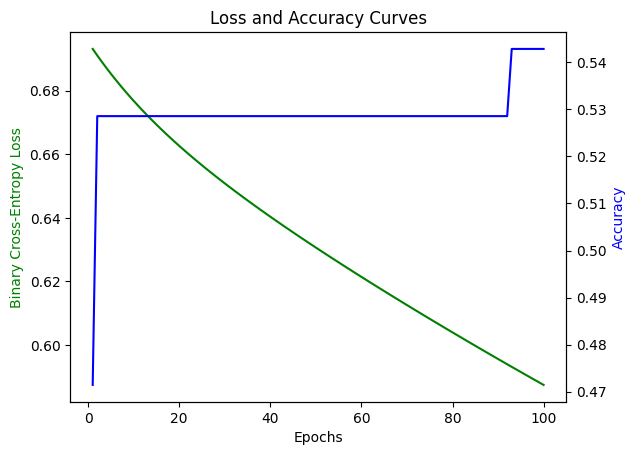

In [31]:
# Train Perceptron Model
perceptron = Perceptron(learning_rate=0.01, epochs=100)
perceptron.fit(X_train, y_train)

# Predictions on Test Data
y_pred = perceptron.predict(X_test)

# Compute Binary Cross-Entropy Loss
bce_loss = log_loss(y_test, perceptron.activation(np.dot(X_test, perceptron.weights) + perceptron.bias))

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Trained Weights:", perceptron.weights)
print("Trained Bias:", perceptron.bias)
print("Binary Cross-Entropy Loss:", bce_loss)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

# Plot Loss and Accuracy Curves
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(range(1, perceptron.epochs + 1), perceptron.losses, 'g-', label='Loss')
ax2.plot(range(1, perceptron.epochs + 1), perceptron.accuracies, 'b-', label='Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Binary Cross-Entropy Loss', color='g')
ax2.set_ylabel('Accuracy', color='b')
plt.title('Loss and Accuracy Curves')
plt.show()

### Redo


In [24]:
# Load IRIS dataset
dataset = load_iris()
X, y = dataset.data, dataset.target

# Select only Setosa and Versicolor (Binary Classification)
selected_classes = (y == 1) | (y == 2)
X, y = X[selected_classes], y[selected_classes]

In [25]:
# Load IRIS dataset
dataset = load_iris()
X, y = dataset.data, dataset.target

# Select only Setosa and Versicolor (Binary Classification)
selected_classes = (y == 0) | (y == 1)
X, y = X[selected_classes], y[selected_classes]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.losses = []
        self.accuracies = []

    def activation(self, x):
        return 1 / (1 + np.exp(-x))  # Sigmoid Activation Function

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for epoch in range(self.epochs):
            linear_output = np.dot(X, self.weights) + self.bias
            y_pred = self.activation(linear_output)

            # Binary Cross-Entropy Loss
            loss = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
            self.losses.append(loss)

            # Accuracy on training data
            y_pred_class = np.round(y_pred)
            accuracy = accuracy_score(y, y_pred_class)
            self.accuracies.append(accuracy)

            # Update rule
            update = self.lr * (y - y_pred) * y_pred * (1 - y_pred)
            self.weights += np.dot(update, X) / n_samples
            self.bias += np.mean(update)

            print(f"Epoch {epoch+1}: Loss = {loss:.4f}, Accuracy = {accuracy:.4f}")

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.round(self.activation(linear_output))




Epoch 1: Loss = 0.6931, Accuracy = 0.4714
Epoch 2: Loss = 0.6911, Accuracy = 0.5286
Epoch 3: Loss = 0.6891, Accuracy = 0.5286
Epoch 4: Loss = 0.6872, Accuracy = 0.5286
Epoch 5: Loss = 0.6853, Accuracy = 0.5286
Epoch 6: Loss = 0.6835, Accuracy = 0.5286
Epoch 7: Loss = 0.6818, Accuracy = 0.5286
Epoch 8: Loss = 0.6801, Accuracy = 0.5286
Epoch 9: Loss = 0.6784, Accuracy = 0.5286
Epoch 10: Loss = 0.6768, Accuracy = 0.5286
Epoch 11: Loss = 0.6752, Accuracy = 0.5286
Epoch 12: Loss = 0.6737, Accuracy = 0.5286
Epoch 13: Loss = 0.6722, Accuracy = 0.5286
Epoch 14: Loss = 0.6708, Accuracy = 0.5286
Epoch 15: Loss = 0.6693, Accuracy = 0.5286
Epoch 16: Loss = 0.6679, Accuracy = 0.5286
Epoch 17: Loss = 0.6666, Accuracy = 0.5286
Epoch 18: Loss = 0.6652, Accuracy = 0.5286
Epoch 19: Loss = 0.6639, Accuracy = 0.5286
Epoch 20: Loss = 0.6627, Accuracy = 0.5286
Epoch 21: Loss = 0.6614, Accuracy = 0.5286
Epoch 22: Loss = 0.6601, Accuracy = 0.5286
Epoch 23: Loss = 0.6589, Accuracy = 0.5286
Epoch 24: Loss = 0.6

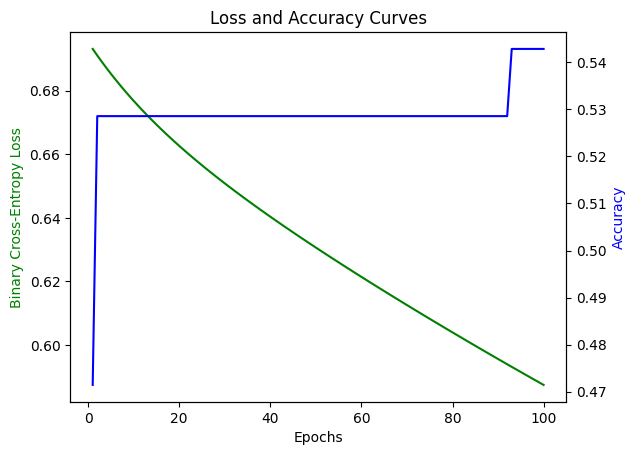

In [28]:
# Train Perceptron Model
perceptron = Perceptron(learning_rate=0.01, epochs=100)
perceptron.fit(X_train, y_train)

# Predictions on Test Data
y_pred = perceptron.predict(X_test)

# Compute Binary Cross-Entropy Loss
bce_loss = log_loss(y_test, perceptron.activation(np.dot(X_test, perceptron.weights) + perceptron.bias))

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Trained Weights:", perceptron.weights)
print("Trained Bias:", perceptron.bias)
print("Binary Cross-Entropy Loss:", bce_loss)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

# Plot Loss and Accuracy Curves
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(range(1, perceptron.epochs + 1), perceptron.losses, 'g-', label='Loss')
ax2.plot(range(1, perceptron.epochs + 1), perceptron.accuracies, 'b-', label='Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Binary Cross-Entropy Loss', color='g')
ax2.set_ylabel('Accuracy', color='b')
plt.title('Loss and Accuracy Curves')
plt.show()

## Problem 2


Epoch 1: MSE Loss = 17.9154
Epoch 2: MSE Loss = 17.0705
Epoch 3: MSE Loss = 16.2690
Epoch 4: MSE Loss = 15.5085
Epoch 5: MSE Loss = 14.7867
Epoch 6: MSE Loss = 14.1016
Epoch 7: MSE Loss = 13.4510
Epoch 8: MSE Loss = 12.8331
Epoch 9: MSE Loss = 12.2461
Epoch 10: MSE Loss = 11.6883
Epoch 11: MSE Loss = 11.1582
Epoch 12: MSE Loss = 10.6542
Epoch 13: MSE Loss = 10.1750
Epoch 14: MSE Loss = 9.7191
Epoch 15: MSE Loss = 9.2855
Epoch 16: MSE Loss = 8.8729
Epoch 17: MSE Loss = 8.4802
Epoch 18: MSE Loss = 8.1064
Epoch 19: MSE Loss = 7.7505
Epoch 20: MSE Loss = 7.4115
Epoch 21: MSE Loss = 7.0886
Epoch 22: MSE Loss = 6.7810
Epoch 23: MSE Loss = 6.4878
Epoch 24: MSE Loss = 6.2084
Epoch 25: MSE Loss = 5.9420
Epoch 26: MSE Loss = 5.6880
Epoch 27: MSE Loss = 5.4458
Epoch 28: MSE Loss = 5.2148
Epoch 29: MSE Loss = 4.9943
Epoch 30: MSE Loss = 4.7840
Epoch 31: MSE Loss = 4.5833
Epoch 32: MSE Loss = 4.3917
Epoch 33: MSE Loss = 4.2087
Epoch 34: MSE Loss = 4.0341
Epoch 35: MSE Loss = 3.8672
Epoch 36: MSE Lo

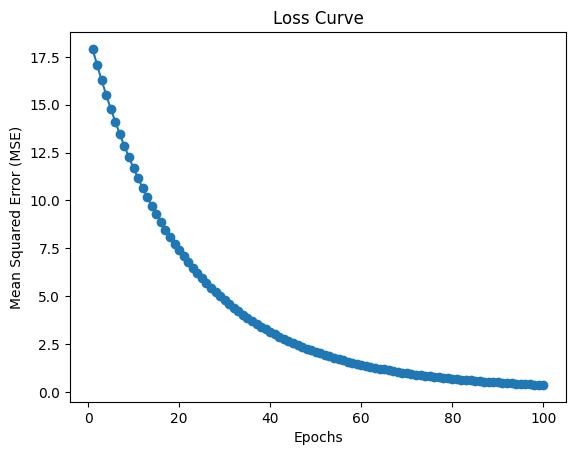

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load IRIS dataset


# Train-Test Split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Perceptron for Regression
class PerceptronRegressor:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.losses = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for epoch in range(self.epochs):
            y_pred = np.dot(X, self.weights) + self.bias

            # Compute MSE Loss
            loss = np.mean((y - y_pred) ** 2)
            self.losses.append(loss)

            # Compute gradient and update weights
            gradient = -2 * (y - y_pred)
            self.weights -= self.lr * np.dot(gradient, X) / n_samples
            self.bias -= self.lr * np.mean(gradient)

            print(f"Epoch {epoch+1}: MSE Loss = {loss:.4f}")

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Train Perceptron Regressor
perceptron_reg = PerceptronRegressor(learning_rate=0.01, epochs=100)
perceptron_reg.fit(X_train, y_train)

# Predictions on Test Data
y_pred = perceptron_reg.predict(X_test)

# Compute Regression Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print Results
print("Trained Weights:", perceptron_reg.weights)
print("Trained Bias:", perceptron_reg.bias)
print("Mean Squared Error (MSE):", mse)
print("R^2 Score:", r2)

# Plot Loss Curve
plt.plot(range(1, perceptron_reg.epochs + 1), perceptron_reg.losses, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Loss Curve')
plt.show()
